In [1]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [2]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t


In [3]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome


In [4]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


First, implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of thereverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [5]:
def naive_rc(p, t):
    occurences = naive(p,t)
    if p != reverseComplement(p):
        occurences.extend(naive(reverseComplement(p),t))
    return occurences

In [6]:
test = naive_rc("AT", "ATGGATGGATGGTA")
print(test)

[0, 4, 8]


In [7]:
lambdagenome = readGenome("lambda_virus.fa")

 1.
 Question 1
 How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.


In [8]:
count_AGGT = naive_rc("AGGT", lambdagenome)
count_AGGT_norc = naive("AGGT", lambdagenome)
print("without rc, count is %d" % len(count_AGGT_norc))
print(len(count_AGGT))

without rc, count is 150
306


2. Question 2 How many times does TTAA or its reverse complement occur in the lambda virus genome?  

Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [9]:
count_TTAA = naive_rc("TTAA", lambdagenome)
print(len(count_TTAA))

195


3.
Question 3

What is the offset of the leftmost occurrence of ACTAAGT\verb|ACTAAGT|ACTAAGT or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of ACTAAGT\verb|ACTAAGT|ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT\verb|ACTTAGT|ACTTAGT is at offset 29, then report 29.

In [10]:
count = naive_rc("ACTAAGT", lambdagenome)
leftmost = min(count)
print(count)
print(leftmost)

[27733, 45382, 26028]
26028


4.
Question 4

What is the offset of the leftmost occurrence of AGTCGA\verb|AGTCGA|AGTCGA or its reverse complement in the Lambda virus genome?

In [11]:
count = naive_rc("AGTCGA", lambdagenome)
leftmost = min(count)
print(count)
print(leftmost)

[18005, 23320, 33657, 44806, 450, 1908, 2472, 41927, 45369]
450


5.
Question 5

As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive\verb|naive|naive function called naive_2mm\verb|naive_2mm|naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, ACTTTA\verb|ACTTTA|ACTTTA occurs twice in ACTTACTTGATAAAGT\verb|ACTTACTTGATAAAGT|ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')\verb|naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')|naive_2mm(’ACTTTA’, ’ACTTACTTGATAAAGT’) should return the list [0, 4]\verb|[0, 4]|[0, 4].

How many times does TTCAAGCC\verb|TTCAAGCC|TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches? 

In [12]:
def naive_2mm(p,t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatch = 0
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                mismatch += 1
        if mismatch <= 2:
                occurrences.append(i)  # all chars matched; record
    return occurrences
test = naive_2mm("ACTTTA","ACTTACTTGATAAAGT")
print(test)

[0, 4]


In [13]:
matches = naive_2mm("TTCAAGCC", lambdagenome)
print(len(matches))

191


6.
Question 6

What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [14]:
matches = naive_2mm("AGGAGGTT", lambdagenome)
leftmost = min(matches)

print(leftmost)

49


inally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

 https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [15]:
seqs, quals = readFastq('ERR037900_1.first1000.fastq')
def phred33ToQ(qual):
    return ord(qual) - 33

In [30]:
def createHist(qualities):
    # Create a histogram of quality scores by position
    qualbypos = [0]*100
    for qual in qualities:
        for phred in range(100):
            q = phred33ToQ(qual[phred])
            qualbypos[phred] += q
    return qualbypos
h = createHist(quals)
print(h)

[38435, 38460, 38400, 38428, 38417, 38382, 38362, 38364, 38325, 38343, 38194, 38154, 38089, 38152, 38153, 38099, 38055, 38041, 38067, 38150, 38087, 37989, 38009, 37909, 38028, 37576, 37514, 37503, 37578, 37552, 37629, 37555, 37548, 37433, 37402, 37343, 37198, 37126, 37158, 36904, 36742, 36677, 36645, 36493, 36509, 36375, 36205, 35974, 35847, 35673, 34832, 34739, 34399, 34402, 34025, 33025, 32882, 32741, 32573, 32224, 30805, 30666, 30343, 30131, 29463, 17891, 4526, 17881, 17865, 17852, 17466, 17131, 17134, 17098, 16852, 23745, 23958, 23221, 22902, 22366, 20904, 20584, 20383, 19767, 19095, 18061, 17757, 17152, 16972, 16286, 14811, 14679, 14310, 14152, 13734, 12538, 12278, 12179, 11676, 11561]
100


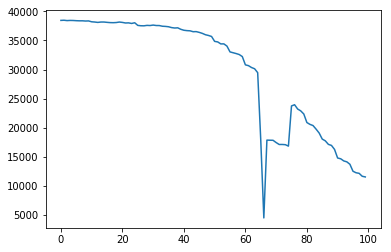

In [32]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(100), h)
plt.show()

In [33]:
minIndex = h.index(min(h)) #index method returns the index
print(minIndex + 1) # "0"th cycle doesn't exist! python indexing starts at 0

66
